### About the dataset:
There are 2 columns in this dataset namely **"password"** & **"strength"**. 
**password** column contains all the passwords where as **strength** column specifies the password strength.

In strength column:
 * 0 means 'Weak'
 * 1 means 'Medium'
 * 2 means 'Strong'

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#importing the dataset
dataset = pd.read_csv('data.csv',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

#### Performing EDA

In [3]:
dataset.shape

(669640, 2)

In [4]:
dataset.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [5]:
#checking for null values
dataset.isnull().sum()

password    1
strength    0
dtype: int64

In [6]:
#as there is only 1 null value, droping it.
dataset.dropna(inplace = True)

#### Shuffling the dataset

In [7]:
my_data = dataset.values

In [8]:
#before shuffling
my_data

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [9]:
type(my_data)

numpy.ndarray

In [10]:
np.random.shuffle(my_data)

In [11]:
#after shuffling
my_data

array([['pat310ricia', 1],
       ['lozaxik668', 1],
       ['jojo1990', 1],
       ...,
       ['540280kkmd', 1],
       ['uxefel460', 1],
       ['willy01061993', 1]], dtype=object)

#### seperating x and y values

In [12]:
X = my_data[:,0]
y = my_data[:,1]

In [13]:
X

array(['pat310ricia', 'lozaxik668', 'jojo1990', ..., '540280kkmd',
       'uxefel460', 'willy01061993'], dtype=object)

In [14]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=object)

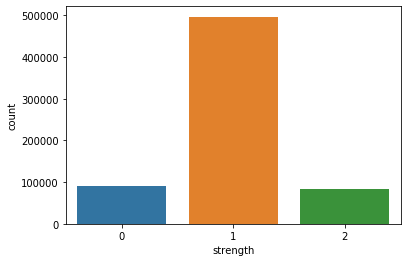

In [15]:
#plotting count of each category
sns.countplot(x = 'strength',data = dataset)

In [16]:
dataset.shape

(669639, 2)

In [17]:
def word_to_char(word):
    characters = [char for char in word]
    return characters

In [18]:
#using TfidfVectorizer to convert our password to numerical form
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer(tokenizer = word_to_char)

Note: by default TfidfVectorizer considers the words as input,but here we want it to consider each character as input

In [20]:
X = vectorizer.fit_transform(X)

In [21]:
X.shape

(669639, 153)

In [22]:
vectorizer.vocabulary_

{'p': 71,
 'a': 56,
 't': 75,
 '3': 37,
 '1': 35,
 '0': 34,
 'r': 73,
 'i': 64,
 'c': 58,
 'l': 67,
 'o': 70,
 'z': 81,
 'x': 79,
 'k': 66,
 '6': 40,
 '8': 42,
 'j': 65,
 '9': 43,
 's': 74,
 'n': 69,
 'y': 80,
 '7': 41,
 'g': 62,
 'f': 61,
 '2': 36,
 'u': 76,
 'b': 57,
 'v': 77,
 '4': 38,
 '5': 39,
 'e': 60,
 'h': 63,
 'w': 78,
 'q': 72,
 'm': 68,
 'd': 59,
 '@': 49,
 '.': 32,
 '_': 54,
 '!': 21,
 '+': 30,
 '$': 24,
 '-': 31,
 '#': 23,
 '*': 29,
 ')': 28,
 '/': 33,
 '=': 46,
 'ú': 138,
 '%': 25,
 ' ': 20,
 'þ': 142,
 '(': 27,
 ']': 52,
 ';': 44,
 '&': 26,
 '?': 48,
 '\x17': 13,
 'ß': 114,
 '\\': 51,
 'é': 124,
 'õ': 134,
 '\x06': 4,
 '<': 45,
 '>': 47,
 'ä': 119,
 '—': 146,
 '^': 53,
 '±': 99,
 'µ': 103,
 '~': 85,
 '÷': 136,
 '[': 50,
 '|': 83,
 'º': 107,
 'æ': 121,
 '°': 98,
 'ñ': 130,
 'ô': 133,
 '{': 82,
 'û': 139,
 'â': 117,
 '\x16': 12,
 'ó': 132,
 'ò': 131,
 '·': 105,
 '\x1e': 19,
 '³': 101,
 'å': 120,
 'ÿ': 143,
 '}': 84,
 '\x8d': 88,
 'ð': 129,
 '²': 100,
 '"': 22,
 'ï': 128,
 

In [23]:
sample = dataset.iloc[0,0]
print(sample)

kzde5577


In [24]:
sample_vec = X[0]
# sample_vec.T.todense()

In [25]:
features = vectorizer.get_feature_names()
# print(features)
df = pd.DataFrame(sample_vec.T.todense(),index = features,columns = ['TFIDF'])
df.sort_values(by=["TFIDF"],ascending=False)

,TFIDF
i,0.499258
a,0.412708
p,0.339707
c,0.322853
t,0.291899
...,...
\,0.000000
],0.000000
^,0.000000
_,0.000000


In [26]:
#converting type to int
y = y.astype(int)

#### splitting into train and test values

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.2)

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
#using one versus rest
log_class=LogisticRegression(penalty='l2',multi_class='ovr')
log_class.fit(X_train,y_train)

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
print(log_class.score(X_test,y_test))

0.8133698703781136


In [31]:
#using multinomial
log_multi = LogisticRegression(solver = 'newton-cg', multi_class='multinomial')
log_multi.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
print(log_multi.score(X_test,y_test))

0.8203960336897438


In [33]:
X_predict = np.array(['vinay!238@@'])
X_predict = vectorizer.transform(X_predict)
log_multi.predict(X_predict)

array([2])

### XGBoost Classifier

In [34]:
# !pip install xgboost

In [35]:
import xgboost as xgb

In [36]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [37]:
#model score
xgb_clf.score(X,y)

0.9864942155400148

In [38]:
#testing score
xgb_clf.score(X_test,y_test)

0.9803327160862553

In [39]:
X_predict = np.array(['123vinay&&'])
X_predict = vectorizer.transform(X_predict)
xgb_clf.predict(X_predict)

array([2])